In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
wp_datapath = "../wepanic_collated_catalogue.csv"
wp_data = pd.read_csv(wp_datapath)

In [3]:
GOOD_SAMPS = wp_data[wp_data['GOOD'] == 1]
OUR_RECORDS = wp_data[wp_data['GOOD'] == 2]

In [15]:
good_samps_hr = GOOD_SAMPS['HEART_RATE_BPM'].values.tolist()
good_samps_rr = GOOD_SAMPS['RESP_RATE_BR_PM'].values.tolist()

our_records_hr = OUR_RECORDS['HEART_RATE_BPM'].values.tolist()
our_records_rr = OUR_RECORDS['RESP_RATE_BR_PM'].values.tolist()

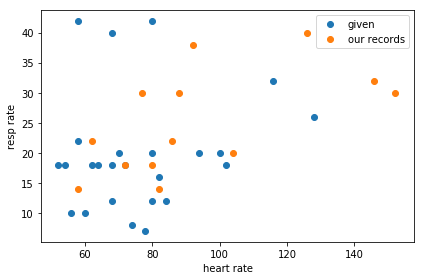

In [17]:
plt.scatter(good_samps_hr, good_samps_rr, label='given')
plt.scatter(our_records_hr, our_records_rr, label='our records')
plt.xlabel("heart rate")
plt.ylabel('resp rate')
plt.legend()
plt.tight_layout()
plt.savefig('figs/new_records.png')
plt.show()

r_value 0.38300


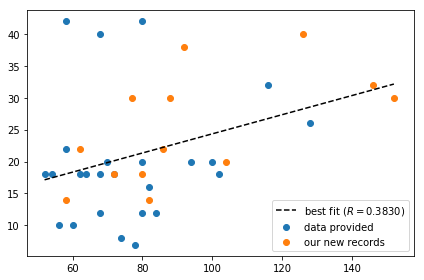

In [36]:
total_hr = our_records_hr + good_samps_hr
total_rr = our_records_rr + good_samps_rr
#print(len(total_hr), len(our_records_hr))
slope, intercept, r_value, p_value, std_err = linregress(total_hr, total_rr)

def linear_fit(Xs):
    return slope*np.array(Xs) + intercept

print('r_value {:0.5f}'.format(r_value))

plt.scatter(good_samps_hr, good_samps_rr, label='data provided')
plt.scatter(our_records_hr, our_records_rr, label='our new records')
Xdata = np.linspace(min(total_hr), max(total_hr), 100)
plt.plot(Xdata,linear_fit(Xdata), label=r'best fit $(R={:0.4f})$'.format(r_value),linestyle='--',color='black')
plt.legend()
plt.tight_layout()
plt.savefig('figs/new_records_withfit.png')
plt.show()

In [28]:
min(total_hr)

52.0

[80.0, 126.0, 62.0, 152.0, 72.0, 77.0, 86.0, 146.0, 88.0, 92.0, 82.0, 104.0, 58.0]
